In [13]:
# Neural Network-based QoS Prediction and Optimization
# Author: Charis E Shiny

In [1]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from tensorflow.keras.optimizers import Adam

In [2]:
# --- Simulated Dataset ---
# Features: traffic load, packet size, active users, link utilization
# Outputs: latency, jitter, packet loss (QoS metrics)
np.random.seed(42)
n_samples = 1000
traffic_load = np.random.rand(n_samples)
packet_size = np.random.rand(n_samples)
active_users = np.random.randint(1, 100, n_samples) / 100
link_util = np.random.rand(n_samples)

In [3]:
# Create input features
X = np.vstack([traffic_load, packet_size, active_users, link_util]).T

In [4]:
# Simulate outputs (QoS metrics) with some non-linear relationships
latency = 10 + 50 * traffic_load + 20 * link_util + np.random.normal(0, 2, n_samples)
jitter = 5 + 10 * np.abs(np.sin(packet_size * np.pi)) + np.random.normal(0, 1, n_samples)
packet_loss = 0.01 + 0.2 * (traffic_load * link_util) + np.random.normal(0, 0.01, n_samples)

Y = np.vstack([latency, jitter, packet_loss]).T

In [5]:
# --- Data Scaling ---
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

In [6]:
# --- Train-Test Split ---
split = int(0.8 * n_samples)
X_train, X_test = X_scaled[:split], X_scaled[split:]
Y_train, Y_test = Y_scaled[:split], Y_scaled[split:]

In [7]:
# --- Neural Network Model (LSTM) ---
X_train_seq = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_seq = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3, activation='linear')  # Predict latency, jitter, packet loss
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_seq, Y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# --- Evaluation ---
Y_pred = model.predict(X_test_seq)
Y_pred_rescaled = scaler_Y.inverse_transform(Y_pred)
Y_test_rescaled = scaler_Y.inverse_transform(Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


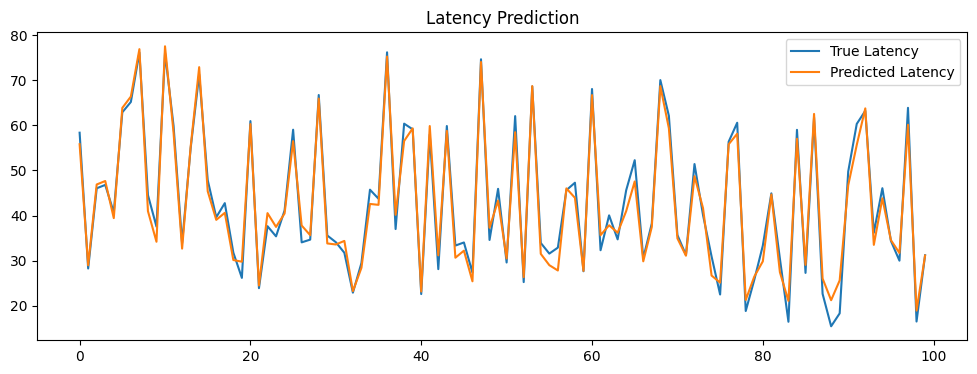

In [10]:
# --- Plot Predictions ---
plt.figure(figsize=(12, 4))
plt.plot(Y_test_rescaled[:100, 0], label='True Latency')
plt.plot(Y_pred_rescaled[:100, 0], label='Predicted Latency')
plt.legend(); plt.title("Latency Prediction"); plt.show()

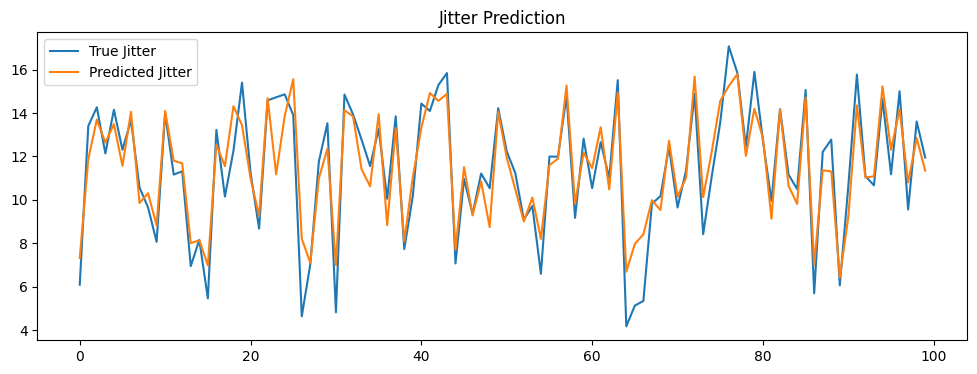

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(Y_test_rescaled[:100, 1], label='True Jitter')
plt.plot(Y_pred_rescaled[:100, 1], label='Predicted Jitter')
plt.legend(); plt.title("Jitter Prediction"); plt.show()

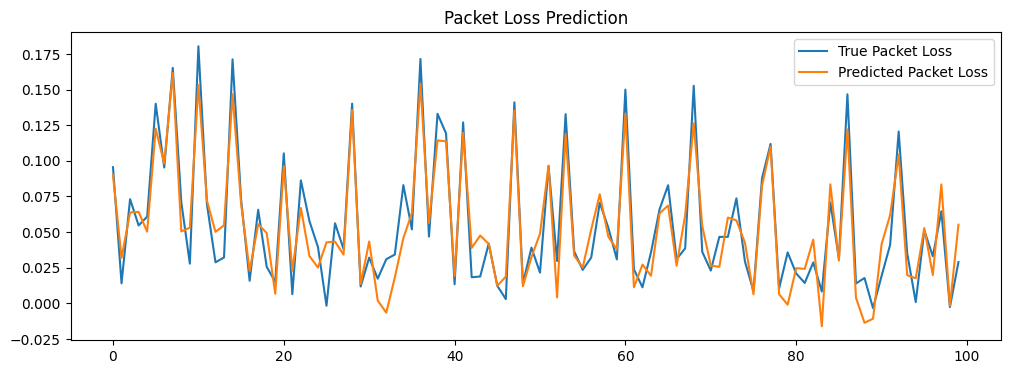

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(Y_test_rescaled[:100, 2], label='True Packet Loss')
plt.plot(Y_pred_rescaled[:100, 2], label='Predicted Packet Loss')
plt.legend(); plt.title("Packet Loss Prediction"); plt.show()

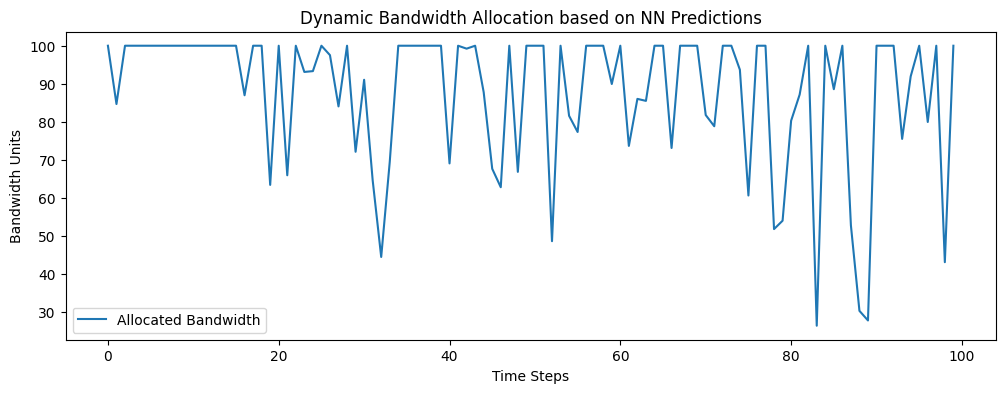

Example optimized bandwidth allocations:
[100.          84.66326141 100.         100.         100.
 100.         100.         100.         100.         100.        ]


In [14]:
# --- QoS Optimization Algorithm ---
# Bandwidth allocation based on predicted demand
# (simple rule-based optimization using NN predictions)

def qos_optimizer(predictions, total_bandwidth=100):
    optimized_allocations = []
    for latency, jitter, loss in predictions:
        # Higher latency/jitter/loss => allocate more bandwidth
        demand_score = latency/100 + jitter/50 + loss*10
        bw_alloc = min(total_bandwidth * demand_score, total_bandwidth)
        optimized_allocations.append(bw_alloc)
    return np.array(optimized_allocations)

bandwidth_alloc = qos_optimizer(Y_pred_rescaled)

plt.figure(figsize=(12, 4))
plt.plot(bandwidth_alloc[:100], label='Allocated Bandwidth')
plt.title("Dynamic Bandwidth Allocation based on NN Predictions")
plt.xlabel("Time Steps"); plt.ylabel("Bandwidth Units"); plt.legend(); plt.show()

print("Example optimized bandwidth allocations:")
print(bandwidth_alloc[:10])